In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from re import search

In [120]:
DATA_PATH = '../data/'

FAKE_DATA_FILE = 'Fake.csv'
TRUE_DATA_FILE = 'True.csv'

In [121]:
true_df = pd.read_csv(DATA_PATH + TRUE_DATA_FILE)
fake_df = pd.read_csv(DATA_PATH + FAKE_DATA_FILE)

In [122]:
true_df['label'] = 'true'
fake_df['label'] = 'fake'
df = pd.concat([fake_df, true_df], ignore_index=True)

In [123]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


# Clean the Data


## Check for missing data

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


## Check for placeholder values and duplicates


In [125]:
title_value_counts = df.title.value_counts()

In [126]:
title_value_counts[title_value_counts > 1]

title
Factbox: Trump fills top jobs for his administration                                                                14
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                                     8
Factbox: Contenders for senior jobs in Trump's administration                                                        8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                            6
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                6
                                                                                                                    ..
EP #7: Patrick Henningsen LIVE with guest Shawn Helton – ‘Top Conspiracies of 2016’                                  2
Facebook Partners With Snopes & Other So-Called ‘Fact Checking’ Sites to Burry ‘Fake News’                           2
CLOAKED ORDER: Who’s Really Behind ‘New Au

There are a lot of titles that are used more than once.   look at the most commonly reused title.

In [127]:
df[df.title == 'Factbox: Trump fills top jobs for his administration']

,title,text,subject,date,label
29701,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 19, 2017",true
29875,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 11, 2017",true
30096,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 21, 2016",true
30118,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 19, 2016",true
30136,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 17, 2016",true
30167,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 15, 2016",true
30186,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 13, 2016",true
30220,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 13, 2016",true
30236,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 12, 2016",true
30289,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 8, 2016",true


In [128]:
df.iloc[29701].text

'(Reuters) - U.S. President-elect Donald Trump will name former Georgia Governor Sonny Perdue as his nominee for secretary of agriculture on Thursday, a senior transition official said on Wednesday. Here is a list of Republican Trump’s selections for top jobs in his administration.  NOTE: Senate confirmation is required for all the posts except national security adviser and White House posts. Tillerson, 64, has spent his entire career at Exxon Mobil Corp, where he rose to chairman and chief executive officer in 2006. A civil engineer by training, the Texan joined the world’s largest publicly traded energy company in 1975 and led several of its operations in the United States as well as in Yemen, Thailand and Russia. As Exxon’s chief executive, he maintained close ties with Moscow and opposed U.S. sanctions against Russia for its incursion into Crimea. Mnuchin, 54, is a successful private equity investor, hedge fund manager and Hollywood financier who spent 17 years at Goldman Sachs Gro

In [129]:
df.iloc[29875].text

'(Reuters) - U.S. President-elect Donald Trump on Wednesday announced he has chosen David Shulkin, who currently heads the Department of Veterans Affairs healthcare system, to head the agency. Here is a list of Republican Trump’s selections for top jobs in his administration.  NOTE: Senate confirmation is required for all the posts except national security adviser and White House posts. Tillerson, 64, has spent his entire career at Exxon Mobil Corp, where he rose to chairman and chief executive officer in 2006. A civil engineer by training, the Texan joined the world’s largest publicly traded energy company in 1975 and led several of its operations in the United States as well as in Yemen, Thailand and Russia. As Exxon’s chief executive, he maintained close ties with Moscow and opposed U.S. sanctions against Russia for its incursion into Crimea. Mnuchin, 54, is a successful private equity investor, hedge fund manager and Hollywood financier who spent 17 years at Goldman Sachs Group Inc

### Dataframe with all the data with duplicate titles

In [130]:
duplicate_title_list = set(title_value_counts[title_value_counts > 1].keys())

In [131]:
df_dup_titles = df[df.title.isin(duplicate_title_list)]

In [132]:
df_dup_titles

,title,text,subject,date,label
1488,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 12, 2017",fake
1535,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 10, 2017",fake
9087,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,politics,"Dec 31, 2017",fake
9088,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,politics,"Dec 31, 2017",fake
9089,“CONSERVATIVE GAY GUY” BLASTS Pence’s Aspen Ne...,It s been said that good fences make good neig...,politics,"Dec 30, 2017",fake
...,...,...,...,...,...
44884,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",true
44886,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",true
44887,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true


In [133]:
df_dup_titles[df_dup_titles.duplicated()]

,title,text,subject,date,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",fake
23926,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",true
24259,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",true
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


There are 209 duplicate rows that will need to be deleted.

Check for rows with duplicate text

In [134]:
df_dup_titles[df_dup_titles.duplicated(['text'])]

,title,text,subject,date,label
9114,WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD Count...,AP News The regulars amble in before dawn and...,politics,"Dec 27, 2017",fake
9738,LEFTIST STORE OWNER Makes Video Asking Libs To...,Things didn t go as well as Nicholle had hoped...,politics,"Oct 6, 2017",fake
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


There are 5964 rows that have duplicate text.

Check for rows that have duplicate title and text

In [135]:
df_dup_titles[df_dup_titles.duplicated(['title', 'text'])]

,title,text,subject,date,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",fake
15892,HOUSE INTEL Slaps Subpoenas on McCain Institut...,Please see our previous report below on the Mc...,Government News,"Dec 27, 2017",fake
15893,PRICELESS! WATCH MSNBC HOST’S Shocked Response...,THIS IS PRICELESS! The video below shows just ...,Government News,"Dec 26, 2017",fake
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


Only 5793 rows with duplicate title and text.

171 rows that have duplicate text but not title
Lets Check how many have empty text values


In [136]:
df_dup_titles[df_dup_titles.text == ' ']

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
11247,MICHAEL FLYNN’S LAWYER Releases Statement Scor...,,politics,"Mar 30, 2017",fake
...,...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",fake
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake


There are around 11,800 rows that have titles used multiple times.
The Duplicate rows and rows with duplicate text has to be removed. Rows without text also need to be removed.|

In [137]:
df[df.text == ' ']

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
...,...,...,...,...,...
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",fake


## Remove Duplicate Data


In [138]:
len(df)

44898

In [139]:
df_clean = df.drop_duplicates(ignore_index=True)

In [140]:
len(df_clean)

44689

Drop Rows with No Text (just a title)

In [141]:
df_clean = df_clean.dropna()

In [142]:
len(df_clean)

44689

Drop Rows with same title and text (keeping the first instance)


In [143]:
df_clean = df_clean.drop_duplicates(['title', 'text'], ignore_index=True)

In [144]:
len(df_clean)

39105

Drop Rows with the same text (keeping the first instance)


In [145]:
df_clean = df_clean.drop_duplicates(['text'], ignore_index=True)

In [146]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38646 entries, 0 to 38645
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38646 non-null  object
 1   text     38646 non-null  object
 2   subject  38646 non-null  object
 3   date     38646 non-null  object
 4   label    38646 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


How many rows were dropped?

In [147]:
len(df) - len(df_clean)

6252

## Check Date Range

In [148]:
try:
    df_clean['date'] = pd.to_datetime(df_clean['date'])
except ValueError:
    print('Not all date values are dates.')

Not all date values are dates.


### Filter instances with invalid dates

I will need to filter out the date values that are not dates.


In [149]:
def not_a_date(string):
 
    try:
        date = pd.to_datetime(string)
        return False
    except ValueError:
        return True

In [150]:
df_bad_dates = df_clean[df_clean['date'].apply(not_a_date)]

In [151]:
df_bad_dates

,title,text,subject,date,label
9357,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,fake
15121,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,fake
15122,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,fake
15424,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,fake
15425,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,fake
16128,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,fake


The instances with text in the date field are all invalid data and will be dropped


### Drop Instances with invalid dates

In [152]:
df_clean = df_clean.drop(df_bad_dates.index)


### Convert dates to datetime type

In [153]:
try:
    df_clean['date'] = pd.to_datetime(df_clean['date'])
except ValueError:
    print('Not all date values are dates.')

Not all date values are dates.


In [154]:
df_clean.date.describe()

count                 38640
unique                 2391
top       December 6, 2017 
freq                    166
Name: date, dtype: object

The description of the data, indicated that it was between 2016 and 2017.  I will need to check the data that is outside it.

In [155]:
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%B %d, %Y', errors='coerce')

In [156]:
df_early = df_clean[df_clean.date < pd.to_datetime('2016-01-01')]
df_early

,title,text,subject,date,label
15226,DEATH OF A NATION BY EXECUTIVE ORDER: Who Vote...,With 25% of Mexico now living in America Ameri...,politics,2015-05-31,fake
15227,JOHN KERRY BREAKS LEG IN BIKE CRASH IN FRENCH ...,"Fortunately, our useless Secretary of State Jo...",politics,2015-05-31,fake
15228,JOE BIDEN’S SON BEAU DIES AT AGE 46,Beau Biden son of Vice President Joe Biden ...,politics,2015-05-31,fake
15229,ARIZONA STATE UNIV DOUBLES TUITION… CLAIMS IT ...,But what about that whole unfair student debt...,politics,2015-05-31,fake
15230,[Video] HISPANIC CANDIDATE FOR SENATOR IN CA M...,This story would have been front page news acr...,politics,2015-05-31,fake
...,...,...,...,...,...
16643,WHITE BASEBALL PLAYER LOSES SCHOLARSHIP AFTER ...,So words deemed offensive are only offensive i...,left-news,2015-05-06,fake
16644,(VIDEO) MEDAL OF HONOR RECIPIENT SCORCHES AMER...,Medal of Honor recipient @Dakota_Meyer asking...,left-news,2015-05-05,fake
16645,CONTROVERSY OVER CHRISTIAN FLAG ENGULFS SMALL ...,Local residents supported the flag but nationa...,left-news,2015-05-05,fake
16646,PRO-ABORTION BOOK FOR CHILDREN: My “Sister Is ...,Leftist indoctrination for toddlers How I wish...,left-news,2015-05-02,fake


In [157]:
df_early.label.value_counts()

label
fake    180
Name: count, dtype: int64

In [158]:
df_late = df_clean[df_clean.date > pd.to_datetime('2017-12-31')]

In [159]:
df_late

,title,text,subject,date,label


In [160]:
df_clean.label.value_counts()

label
true    21191
fake    17449
Name: count, dtype: int64

# Explore the dataset

In [161]:
def show_hist_for_col(df, column, title):
   
    plt.figure(figsize=(16,8))
    df[df.label == 'true'][column].hist(label='True')
    df[df.label == 'fake'][column].hist(alpha=0.4, label='Fake')
    plt.title(title)
    plt.legend()
    plt.show()

## Distribution of Labels

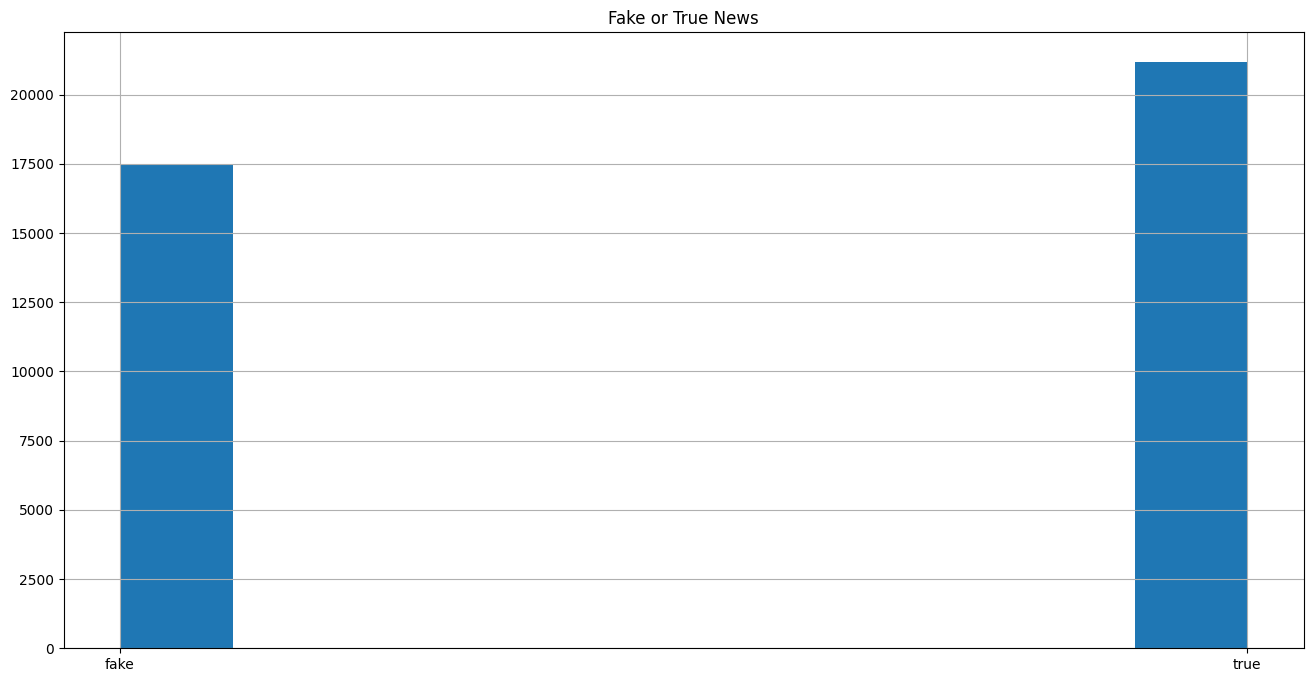

In [162]:
plt.figure(figsize=(16,8))
df_clean.label.hist()
plt.title('Fake or True News')
plt.show()

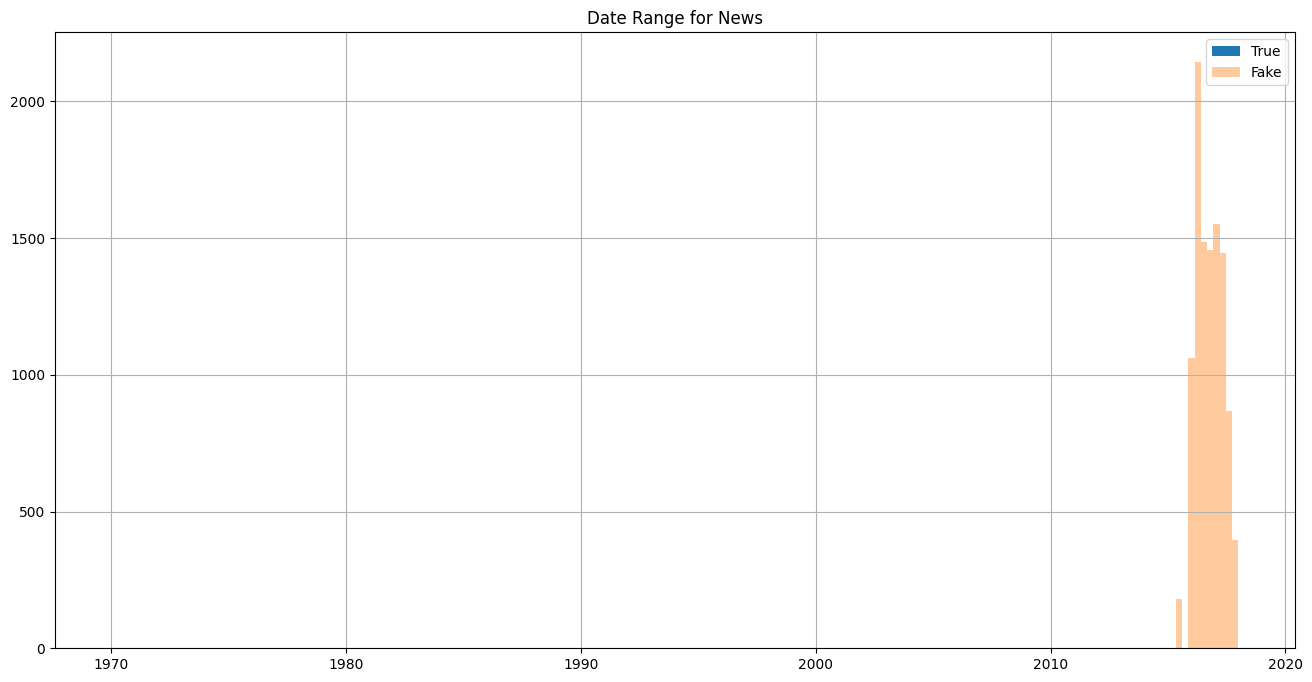

In [163]:
show_hist_for_col(df_clean, 'date', 'Date Range for News')

## Length of Titles

In [164]:
df_clean['title_len'] = df_clean.title.apply(len)

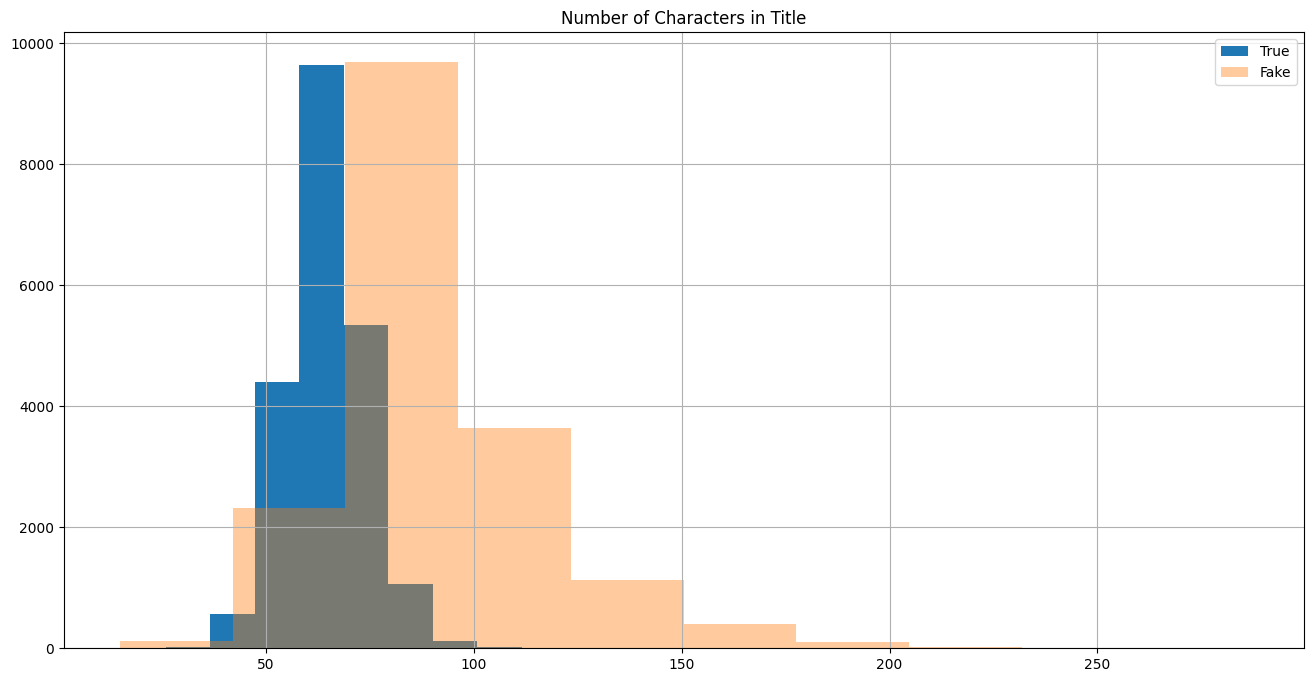

In [165]:
show_hist_for_col(df_clean, 'title_len', 'Number of Characters in Title')

In [166]:
df_clean[df_clean.label == 'true'].title_len.describe()

count    21191.000000
mean        64.660233
std          9.159722
min         26.000000
25%         59.000000
50%         64.000000
75%         70.000000
max        133.000000
Name: title_len, dtype: float64

In [167]:
df_clean[df_clean.label == 'fake'].title_len.describe()

count    17449.000000
mean        91.216803
std         24.504186
min         15.000000
25%         77.000000
50%         88.000000
75%        100.000000
max        286.000000
Name: title_len, dtype: float64

### Fake news stories have a wider range in the length of title than True, and those Fake news titles have a higher median & mean than True ones.

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

In [169]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [170]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [171]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [172]:
vectorizer = CountVectorizer(stop_words='english')
word_count_matrix = vectorizer.fit_transform(df['processed_text'])
sum_words = word_count_matrix.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

In [173]:
top_words_overall = words_freq[:10]
top_words_overall

[('said', 130052),
 ('trump', 116534),
 ('president', 51134),
 ('people', 41080),
 ('state', 31282),
 ('new', 30944),
 ('reuters', 28769),
 ('donald', 27660),
 ('states', 27111),
 ('house', 26963)]

# N-grams Analysis to explore common bigrams

In [174]:
def plot_most_common_words(words_freq, n=10, title='Top Words'):
    words = [item[0] for item in words_freq[:n]]
    counts = [item[1] for item in words_freq[:n]]
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(words)), counts, color='skyblue')
    plt.yticks(range(len(words)), words)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

In [175]:
vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
bigram_matrix = vectorizer_bigrams.fit_transform(df['processed_text'])
sum_bigrams = bigram_matrix.sum(axis=0)
bigrams_freq = [(bigram, sum_bigrams[0, idx]) for bigram, idx in vectorizer_bigrams.vocabulary_.items()]
bigrams_freq_sorted = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)

In [176]:
top_bigrams = bigrams_freq_sorted[:10]

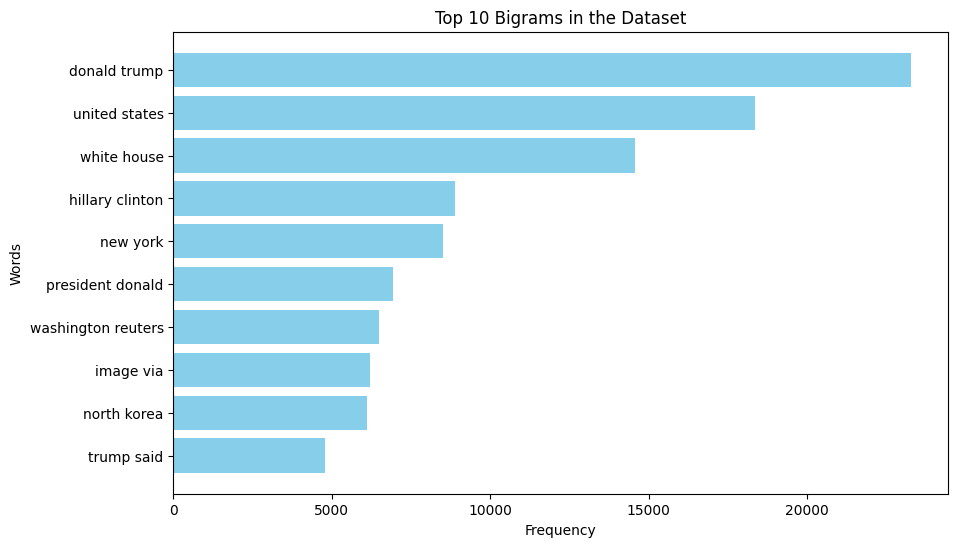

In [177]:
plot_most_common_words(top_bigrams, 10, 'Top 10 Bigrams in the Dataset')

## Said

In [179]:
def check_string_for(substring, fullstring):
    """Check if the substring is in the fullstring"""
    if search(substring, fullstring):
        return True
    else:
        return False

In [181]:
df_said = df_clean[df_clean.text.apply(lambda news_text: check_string_for('said', news_text))]

In [182]:
df_said

,title,text,subject,date,label,title_len
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,69
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,70
12,Bad News For Trump — Mitch McConnell Says No ...,Republicans have had seven years to come up wi...,News,2017-12-21,fake,76
13,WATCH: Lindsey Graham Trashes Media For Portr...,The media has been talking all day about Trump...,News,2017-12-20,fake,91
15,Tone Deaf Trump: Congrats Rep. Scalise On Los...,Donald Trump just signed the GOP tax scam into...,News,2017-12-20,fake,78
...,...,...,...,...,...,...
38641,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,NaT,true,61
38642,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,NaT,true,52
38643,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,NaT,true,49
38644,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,NaT,true,61


In [183]:
df_said.label.value_counts()

label
true    19855
fake     9849
Name: count, dtype: int64

Stories using the term said indicate that the news story is true.  With twice as many "true" news reports featuring said as "fake", it appears that the true ones are more interested with producing quotations, or at least quotations in this type.